<img src="images/000_000_epom_logo.png" alt="ePOM" title="" align="center" width="12%" alt="Python logo\"></a>

<img align="right" width="10%" style="padding-right:10px;" src="images/gge_logo_image.jpg">

# Exercise: Tide Lab - Harmonic Analysis Using Least Squares

This practical exercise will challenge you to use the skills you have learned in Python so far to complete a practical exercise using hydrographic data. It will also challenge you to use skills and knowledge aquired in the Geodesy and Geomatics program and apply them in a practical application.

## Introduction

The purpose of this exercise is to determine the amplitude and phase of a set of tidal harmonic constituents from one month of water level height observations.

The exercise will be in two parts:
1. Determine the **amplitude** and **lunar node factors** *f* and *u* for each of the five principal harmonic constituents (M2, N2, S2, K1, O1) at your station.
2. Determine the **phase lag** for each of the five constituents

### Harmonic Model Equation

The harmonic model equation describes how the astronomical tidal constituents combine to represent tidal motion as a function of tim. The equation allows for a static datum shift and sums the harmonic constituents as cosines with known frequency(ex: M2 -> 1/12.4206 cph), amplitude and phase.

<img src="images/harmoneqn.png" alt="ePOM" title="" align="center" width="40%" alt="Python logo\"></a>

For more details on the harmonic model equation and tide theory, see class notes and handouts from GGE5011.

## Part One: Determine the Constituent Amplitudes

The first goal will be to determine the amplitudes of the five tidal constituents being considered. This notebook contains a skeleton code which will accomplish some of the tasks required, but will require substantial addition and modification in order to fulfill the goals of this exercise.

The demonstration code uses 32 hours of data from Tofino BC to calculate for just two constituents: M2 and K1. The example code does not account for *f* or *u*, that will need to be added to your code.  

### Aquire the Data

Before we can start coding, we must aquire the data. Choose any coastal tide station listed on the [NOAA Tides and Currents](https://tidesandcurrents.noaa.gov/stations.html?type=Water+Levels) website, as long as the following conditions are met:
* The total tidal range is greater than one meter
* There is at least one month of continuous **verified** data

It is important to ensure the data is downloaded with the correct parameters. Ensure you select **meters** for units, and **GMT** for the time zone.

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Download a `.csv` file containing one month of verified water level data conforming to the conditions noted above.

### Prepare the data

There are several steps which we must complete before starting to work with the data.

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

This first code cell will be where we import the required libraries for the notebook. If you add a library, ensure you run this cell again.

In [205]:
#These are the libraries necessary for the demo code to function
import numpy as np
import math
from datetime import datetime
import matplotlib.pyplot as plt

#Add any addional libraries below
import json
import requests


Next we will need to import the data. As noted above, the sample data used in the demo code is hard coded in, and comprises of 32 hours of waterlevel data from Tofino BC.

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Modify the followin code cell to **import** the verified water level data you have downloaded. In addition, add code to print the **station name** and **number**.

In [206]:
#This is the demo data from Tofino BC
waterlevels_list = [1.97, 1.46, 0.98, 0.73, 0.67, 0.82, 1.15, 1.58, 2.00,\
                    2.33, 2.48, 2.43, 2.25, 2.02, 1.82, 1.72, 1.75, 1.91,\
                    2.22, 2.54, 2.87, 3.10, 3.15, 2.94, 2.57, 2.06, 1.56,\
                    1.13, 0.84, 0.73, 0.79, 1.07]

print('Station Name: Tofino BC    Station Number: Does not have one!')

Station Name: Tofino BC    Station Number: Does not have one!


In [207]:
#Start your code to import the data you have downloaded below
# Eastport, Maine
# Taken from "Connecting to an API" notebook

Eastport_id = 8410140
startdate = 20250101
enddate = 20250201

start_dt = datetime(2025,1,1)
end_dt = datetime(2025,2,1)

start_day_of_year = start_dt.timetuple().tm_yday
end_day_of_year = end_dt.timetuple().tm_yday

#about 3 months of data, more than enough to extract the consituents

NOAA_url = "https://tidesandcurrents.noaa.gov/api/datagetter?begin_date=%s&end_date=%s&station=%s\
&product=hourly_height&datum=mllw&units=metric&time_zone=gmt&application=UNB&format=json" % (startdate,enddate,Eastport_id)

#print(NOAA_url)

Eastport_wl = []
#Eastport_wl = waterlevels_list
try:
    datarequest = requests.get(NOAA_url)
    Eastport_wl = json.loads(datarequest.content)
except Exception as e:
    Eastport_wl = 'Error'
    
#print(Eastport_wl)

If you need help with importing `.csv` files, remember that there is detailed documentation for most python libraries. For documentation on the `CSV` library, [follow this link](https://docs.python.org/3/library/csv.html) to the official Python documentation.

You can see above that we have the water level data in a list. What we want though is for it to be in an array to allow more math functionallity and we want it to be in a column shape. To do this we need to know the number of entries to specify the correct shape.

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Modify the code below to **convert** the imported data into an **array** with one column.

In [208]:
#Calculate the number of hours of data
hours = len(waterlevels_list)
#Cast into an array and reshape to a column
waterlevels = np.array(waterlevels_list)
waterlevels = waterlevels.reshape(hours, 1)

print(waterlevels)

[[1.97]
 [1.46]
 [0.98]
 [0.73]
 [0.67]
 [0.82]
 [1.15]
 [1.58]
 [2.  ]
 [2.33]
 [2.48]
 [2.43]
 [2.25]
 [2.02]
 [1.82]
 [1.72]
 [1.75]
 [1.91]
 [2.22]
 [2.54]
 [2.87]
 [3.1 ]
 [3.15]
 [2.94]
 [2.57]
 [2.06]
 [1.56]
 [1.13]
 [0.84]
 [0.73]
 [0.79]
 [1.07]]


In [209]:
#Start your code to below
Eastport_wl_list = []
for wl in Eastport_wl['data']:
    Eastport_wl_list.append(float(wl['v']))
Eastport_wl_hours = len(Eastport_wl_list)
Eastport_wl_arr = np.array(Eastport_wl_list).reshape(Eastport_wl_hours,1)

print(Eastport_wl_arr)

[[ 1.088]
 [ 2.377]
 [ 3.712]
 [ 4.924]
 [ 5.628]
 [ 5.49 ]
 [ 4.82 ]
 [ 3.714]
 [ 2.523]
 [ 1.389]
 [ 0.659]
 [ 0.596]
 [ 1.408]
 [ 2.656]
 [ 4.037]
 [ 5.386]
 [ 6.311]
 [ 6.37 ]
 [ 5.67 ]
 [ 4.528]
 [ 3.138]
 [ 1.736]
 [ 0.59 ]
 [ 0.103]
 [ 0.554]
 [ 1.617]
 [ 2.999]
 [ 4.412]
 [ 5.588]
 [ 6.076]
 [ 5.684]
 [ 4.79 ]
 [ 3.593]
 [ 2.371]
 [ 1.236]
 [ 0.539]
 [ 0.691]
 [ 1.641]
 [ 2.919]
 [ 4.294]
 [ 5.57 ]
 [ 6.253]
 [ 6.032]
 [ 5.177]
 [ 3.908]
 [ 2.596]
 [ 1.24 ]
 [ 0.254]
 [-0.007]
 [ 0.642]
 [ 1.783]
 [ 3.151]
 [ 4.493]
 [ 5.483]
 [ 5.745]
 [ 5.206]
 [ 4.248]
 [ 3.054]
 [ 1.875]
 [ 0.854]
 [ 0.355]
 [ 0.714]
 [ 1.743]
 [ 3.064]
 [ 4.415]
 [ 5.547]
 [ 6.038]
 [ 5.665]
 [ 4.752]
 [ 3.464]
 [ 2.165]
 [ 0.917]
 [ 0.091]
 [ 0.065]
 [ 0.9  ]
 [ 2.141]
 [ 3.532]
 [ 4.841]
 [ 5.697]
 [ 5.734]
 [ 5.088]
 [ 4.07 ]
 [ 2.886]
 [ 1.677]
 [ 0.741]
 [ 0.463]
 [ 1.059]
 [ 2.166]
 [ 3.51 ]
 [ 4.834]
 [ 5.858]
 [ 6.129]
 [ 5.606]
 [ 4.589]
 [ 3.286]
 [ 1.919]
 [ 0.731]
 [ 0.072]
 [ 0.27 ]
 [ 1.209]


Converting lists to arrays will need to occur at several more points during the course of the exercise and will not have a dedicated code cell like the previous cell, it will simply be included in the calculation.

### Additional Inputs

Next we need to set up an array with the times in it. Since this is hourly data we will call the first observation hour 0 and count up by one from there.

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Modify the following cell to add an array with the **times** for each of your observation.

In [210]:
#Create an array with times for each water level entry
timelist = list(range(0, hours))
time = np.array(timelist)

In [211]:
#Start your code below
time_Eastport = np.array(list(range(0,Eastport_wl_hours)))

We now need to input the harmonic frequencies we are going to be extracting from the data. In the case of the demo data we are extracting the K1 and M2 freqencies, however you will need to input all five [harmonic frequencies](https://en.wikipedia.org/wiki/Theory_of_tides#Tidal_constituents) you are calculating for. Those frequencies are as follows:

**Constitiuent** | **Frequency**
:---: | :---:
M2 | **2$\pi$/12.4206** *rad/hour*
N2 | **2$\pi$/12.6584** *rad/hour*
S2 | **2$\pi$/12.0000** *rad/hour*
K1 | **2$\pi$/23.9344** *rad/hour*
O1 | **2$\pi$/25.8194** *rad/hour*

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Modify the following code cell to input all the **constituent frequencies** you will use in your code.

In [212]:
#Input the two constitiuent frequencies for the demo code
frequencieslist = [2 * math.pi / 23.9344, 2 * math.pi / 12.4206] #K1, M2
frequencies = np.array(frequencieslist)
print(frequencies)

[0.26251693 0.5058681 ]


In [213]:
#Begin your code below
tau = 2*math.pi
Eastport_frqs = np.array([
    tau/12.4206, #M2
    tau/12.6584, #N2
    tau/12.0000, #S2
    tau/23.9344, #K1
    tau/25.8194  #O1
]) 
print(Eastport_frqs)

[0.5058681  0.49636489 0.52359878 0.26251693 0.24335133]


### Lunar Node Factors

Next we must calculate the **Lunar Node Factors** *__f__* and *__u__* for each constituent. This is because we are not using a long enough time series of data to catch the important contributions made by the precession of the lunar orbit. We can however model the effect and apply that as an offset to our calculations using the data. This correction step is not modeled in the example code.

For details on how the calculation works, see the GGE5011 lecture notes.

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Use the following code cell to calculate the *__f__* and *__u__* for each constituent.

In [214]:
#Start your code below
#using the order M2,N2,S2,K1,O1

#for Solar factors such as S2 just use f=1, u=0

#deg to rad: 0.01745329
dtr = 0.01745329

def amplitude_scale(year:int, day_of_year:int):
    i = int(0.25*(year-1901))
    N = dtr*(259.16 - 19.3282*(year-1900) - 0.0530*(day_of_year+i))
    
    return [# f amplitude scale factor
            1 - 0.037*math.cos(N), #M2
            1 - 0.037*math.cos(N), #N2
            1, #S2
            1.006+0.115*math.cos(N)-0.009*math.cos(2*N), #K1
            1.009+0.187*math.cos(N)-0.015*math.cos(2*N), #O1
    ]

def phase_offset(year:int, day_of_year:int):
    i = int(0.25*(year-1901))
    N = dtr*(259.16 - 19.3282*(year-1900) - 0.0530*(day_of_year+i))
    
    return [# u phase shift
            dtr*(-2.1*math.sin(N)), #M2
            dtr*(-2.1*math.sin(N)), #N2
            0, #S2
            dtr*(-8.9*math.sin(N) + 0.7*math.sin(2*N)), #K1
            dtr*(10.8*math.sin(N) - 1.3*math.sin(2*N)+0.2*math.sin(3*N)), #O1
    ]

#Usually f and u are found for the mid point of the cycle

def get_f_amp_scale(year:int, start_day:int, end_day:int):
    #f_amp_scale = []
    day = start_day + (end_day-start_day)/2

    """for i in range(start_day,end_day):
        amp = amplitude_scale(year,i)
        for j in range(1,25):
            f_amp_scale.append(amp)
        #f_amp_scale.append(amp)
    return f_amp_scale"""
    return amplitude_scale(year,day)

def get_u_phase_offset(year:int, start_day:int, end_day:int):
    #u_phase_offset = []
    day = start_day + (end_day-start_day)/2
    """for i in range(start_day,end_day):
        offset = phase_offset(year,i)
        #u_phase_offset.append(offset)
        for j in range(1,25):
            u_phase_offset.append(offset)"""
    return phase_offset(year,day) #u_phase_offset

f_amp_scale = get_f_amp_scale(2025,start_day_of_year,end_day_of_year+1) #+1 because range is exclusive
u_phase_offset = get_u_phase_offset(2025,start_day_of_year,end_day_of_year+1)
print(f_amp_scale)
print(u_phase_offset)

[0.9630019704057717, 0.9630019704057717, 1, 1.1119957928663582, 1.1809932366302436]
[-0.0003782533550379406, -0.0003782533550379406, 0, -0.001350918268476963, 0.0015850712708455625]


Now that the lunar node factors have been calculated we need to apply them to the phases and amplitudes below.

### Least Squares Calculation

The first part of the least squares equation will be the construction of the design matrix. You will need to determine how to expand the matrix with the additional constituent frequencies you are using. 

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Modify the code in the cell below to construct the **design matrix** for the calculation with all five constituent frequencies.

In [215]:
#Set up empty lists to work with
xrow = list()
xlist = list()
#Loop through each time and water level pair
for j in range(0, hours):
    xrow = [1, 
            math.cos(frequencies[0] * time[j]),
            math.sin(frequencies[0] * time[j]),
            math.cos(frequencies[1] * time[j]),
            math.sin(frequencies[1] * time[j])
           ]
    xlist.append(xrow)
#Convert to an array then to a matrix to enable matrix algebra
xarray = np.array(xlist)
x = np.asmatrix(xarray)

In [216]:
#Begin your code below
#Least squares
# v = Ax-b, or residuals = designMatrix*params - observations
# v, x, b are columns? A is a matrix of our choice
# want to minimize the residuals (through choice in x)
# so we make A be made of partial derivatives, 1 row per param xi, each col is dxi/d_equation_var
# then solve for x, x = (A^T A)^-1 * A^T * b

#For solving the tidal harmonics
#f(t) = A0 + sum(Ai * sin(frq*t - phi)) #to ????, we need to break this up. sin(a-b) = sin(b)cos(a) + cos(b)sin(a)
#f(t) = A0 + sum(Ai * sin(phi)cos(frq*t) + Ai * cos(phi)sin(frq*t))
#let ai = Ai*sin(phi_i+ui)/fi, bi = Ai*cos(phi_i+ui)/fi #is the divide by fi correct??

#f(t) = A0 + sum(ai*cos(frq*t) + bi*sin(frq*t))
#substitute frq = 2pi / Pi (phase speed of the constituent)
#f(t) = A0 + sum(ai*cos(2pi*t/Pi) + bi*sin(2pi*t/Pi))


#tan-1(bi/ai) = phi_i -> phase (or phi_i+u for lunar)
#sqrt(ai^2 + bi^2) = A_i -> Amplitude (or f*A_i for Lunar)

#A = [df/A0, df/dai, df/dbi] (increment i per row) = [1, cos(frq_i*t_i), sin(frq_i*t_i)]

#1:04:20

print(len(time_Eastport)) #should have same length as water levels
print(len(Eastport_frqs))
print(len(Eastport_wl_arr)) # or b (observations) in the parameter solving
print(len(f_amp_scale))

A = []
for i in range(0,Eastport_wl_hours):
    row = [1] #why the 1? -> df/dA0
    frq_count = 0
    for frq in Eastport_frqs: #We go to the right to expand out the Sum() portion of the equation
        #row.append(math.cos(frq*time_Eastport[i] + u_phase_offset[frq_count])) #/ f_amp_scale[frq_count]) #ai
        #row.append(math.sin(frq*time_Eastport[i] + u_phase_offset[frq_count])) #/ f_amp_scale[frq_count]) #bi 
        row.append(math.cos(frq*time_Eastport[i])) #/ f_amp_scale[frq_count]) #ai
        row.append(math.sin(frq*time_Eastport[i])) #/ f_amp_scale[frq_count]) #bi 
        frq_count +=1
    A.append(row)
    #wt = Eastport_frqs[] * time_Eastport[i]
    #A.append([1, math.cos(wt), sin(wt)])
A = np.asmatrix(A)
print(A)

# + u_phase_offset[i][frq_count]


768
5
768
5
[[ 1.          1.          0.         ...  0.          1.
   0.        ]
 [ 1.          0.87475415  0.484567   ...  0.25951207  0.9705359
   0.24095656]
 [ 1.          0.53038965  0.84775398 ...  0.50124231  0.88387987
   0.46771398]
 ...
 [ 1.         -0.84017031 -0.54232264 ... -0.23427744 -0.68964312
  -0.72414941]
 [ 1.         -0.47215081 -0.88151779 ...  0.02603874 -0.49483486
  -0.86898703]
 [ 1.          0.01413854 -0.99990005 ...  0.28457073 -0.27086687
  -0.96261682]]


Now that the design matrix is set up, we can proceed to the least squares calculation itself and the calculation of the amplitude of the constituents.

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Modify the code cell below to conduct the **least squares** calculation on your data, and to calculate the **amplitudes** for all five constituents. **Print** the resulting amplitudes.

In [217]:
#Perform the least squares calculation
z = np.linalg.inv(np.transpose(x) @ x) @ (np.transpose(x) @ waterlevels)
#Calculate the amplitude of each constituent
amp_k1 = math.sqrt(z[1]**2 + z[2]**2)
amp_m2 = math.sqrt(z[3]**2 + z[4]**2)
#Print the results
print('Tofino Constituent Amplitudes \n  K1: '+str('%.3f' % amp_k1)+' (m)'+'\n  M2: '+str('%.3f' % amp_m2)+' (m)')

Tofino Constituent Amplitudes 
  K1: 0.604 (m)
  M2: 0.799 (m)


C:\Users\Peter\AppData\Local\Temp\ipykernel_16404\2647479805.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  amp_k1 = math.sqrt(z[1]**2 + z[2]**2)
C:\Users\Peter\AppData\Local\Temp\ipykernel_16404\2647479805.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  amp_m2 = math.sqrt(z[3]**2 + z[4]**2)


In [218]:
#Start your code below
# params x = (A^T A)^-1 * A^T * b

AT = np.transpose(A)
#print(AT @ A)
#print(np.linalg.inv(AT @ A))
params = np.linalg.inv(AT @ A) @ AT @ Eastport_wl_arr
#print(params)

#sqrt(ai^2 + bi^2) = A_i -> Amplitude (or f*A_i for Lunar, which will be corrected later)
Amplitudes_scaled = []
#phases_offset = []
#Amp_unscaled = []

for i in range(0,int( (len(params)-1)/2 )):
    ai = params[i*2+1]# / f_amp_scale[i-1]
    bi = params[i*2+2]# / f_amp_scale[i-1]
    Amplitudes_scaled.append(math.sqrt(ai*ai + bi*bi)/f_amp_scale[i])
    #Amp_unscaled.append(math.sqrt(ai*ai + bi*bi))
    #print(f_amp_scale)
    #phases_offset.append(math.inv)
Amplitudes_scaled = np.array(Amplitudes_scaled)

#print(Amp_unscaled)
#print(f_amp_scale)
print(Amplitudes_scaled)


#Amplitudes = Amplitudes_scaled / np.array(f_amp_scale)
#print(Amplitudes)


[2.69398079 0.40006677 0.38695114 0.18605073 0.10244946]


C:\Users\Peter\AppData\Local\Temp\ipykernel_16404\2592790124.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Amplitudes_scaled.append(math.sqrt(ai*ai + bi*bi)/f_amp_scale[i])


Constituents for Eastport, Maine according to NOAA
1. M2 = 2.648m
2. N2 = 0.542m
3. S2 = 0.415m
4. K1 = 0.155m
5. O1 = 0.118m

This concludes the first part of the exercise. Remember to conduct the calculations for all five constituents when using your data. It is possible to check your results by clicking the Harmonic Constituents button at the bottom of the station page where you downloaded the data. 

Check your results against the listed harmonic constituent amplitudes. The amplitudes you have calculated will not be exact but should be close. NOAA has significantly longer records, and considers a far greater number of constituents. 

## Part Two: Determine the Constituent Phase Lag

We now move to part two of the exercise. We have calculated the amplitudes of the various constituents, we now need to calculate the phase offsets required for the constituents to be combined in such a way to produce the tidal signal.

### Phase Offsets

We will now calculate the relative phase of the constituents. This phase offset will be referenced to time 0 in degrees.

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Calculate the **Relative Phase Offset** as referenced to time 0 in degrees.

In [219]:
#Use the least squares results to calculate phase offset
phase_k1 = np.rad2deg(math.atan2(z[2], z[1]))
phase_m2 = np.rad2deg(math.atan2(z[4], z[3]))

C:\Users\Peter\AppData\Local\Temp\ipykernel_16404\3416379956.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phase_k1 = np.rad2deg(math.atan2(z[2], z[1]))
C:\Users\Peter\AppData\Local\Temp\ipykernel_16404\3416379956.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phase_m2 = np.rad2deg(math.atan2(z[4], z[3]))


In [220]:
#Start your code below
phases = []
for i in range(0,int( (len(params)-1)/2 )):
    phases.append(math.atan2(params[i*2+1],params[i*2+2])) #+ u_phase_offset[i])
print(phases)

[-0.7518641287386344, 1.3185056202782037, -1.187478057487141, -1.9646067043751705, -2.307549824716599]


C:\Users\Peter\AppData\Local\Temp\ipykernel_16404\2713811367.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phases.append(math.atan2(params[i*2+1],params[i*2+2])) #+ u_phase_offset[i])


Next we need to calculate the equilibrium phase. This references the phases not against time zero but against a reference date.

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Calculate the **Equilibrum Phase** of the constituents.

In [221]:
#Calculate time from reference date to start date of data
startdate = datetime(2009, 5, 22, 0)
offset = startdate - datetime(1899, 12, 31, 12)
#Calculate offset/10000
d = offset / 10000
#Convert offset into days
numdays = offset.days
numseconds = offset.seconds
offset = numdays + ((numseconds / 3600) / 24)
#Convert d into days
numdays2 = d.days
numseconds2 = d.seconds
d = numdays2 + ((numseconds2 / 3600) / 24)
#Calculate
args = np.array([[1, offset, d**2, d**3]]).T
print(args)

[[1.00000000e+00]
 [3.99535000e+04]
 [1.59627994e+01]
 [6.37769263e+01]]


In [222]:
#Start your code below
offset_eastport = start_dt - datetime(1899, 12, 31, 12)
d_eastport = offset_eastport / 10000

offset_eastport = offset_eastport.days + ((offset_eastport.seconds/3600)/24)
d_eastport = d_eastport.days + ((d_eastport.seconds/3600)/24)
args_eastport = np.array([[1,offset_eastport, d_eastport**2, d_eastport**3]]).T
print(args_eastport)

[[1.00000000e+00]
 [4.56565000e+04]
 [2.08451430e+01]
 [9.51715886e+01]]


### Astronomical Terms

Next up we will calculate the astronomical terms.

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Modify the code in the cell below to calculate the **Astronomical Arguments** for your data, and print out the results.

In [223]:
#Enter the astronomical parameter coefficients
sc= np.array([[ 270.434164,13.1763965268,-0.0000850, 0.000000039]])
hc= np.array([[ 279.696678, 0.9856473354, 0.00002267,0.000000000]])
pc= np.array([[ 334.329556, 0.1114040803,-0.0007739,-0.00000026]])
npc= np.array([[-259.183275, 0.0529539222,-0.0001557,-0.000000050]])
ppc= np.array([[ 281.220844, 0.0000470684, 0.0000339, 0.000000070]])
#Form the array and matrix multiply 
astro = np.array([[sc, hc, pc, npc, ppc]])
astro = astro @ args / 360 % 1
astro = np.reshape(astro, (5,1))
#Augment with tau
starttime = startdate.toordinal() + 366
tau = (starttime % 1) + astro[1] - astro[0]
astro = np.array([[tau, astro[0], astro[1], astro[2], astro[3], astro[4]]])
#Convert to degrees
astro = astro*360
astro = np.reshape(astro, (6,1))
#Print out results
print('Astronomical Arguments for Tofino are: \n  tau: '+str(astro[0][0])+'°\n  s: '+str(astro[1][0])+'°\n  h: '\
      +str(astro[2][0])+'°\n  p: '+str(astro[3][0])+'°\n  np: '+str(astro[4][0])+'°\n  pp: '+str(astro[5][0])+'°')

Astronomical Arguments for Tofino are: 
  tau: 26.166411627349362°
  s: 33.59144315321828°
  h: 59.75785478056764°
  p: 105.30010807357328°
  np: 56.50876702098298°
  pp: 283.10193692268535°


In [224]:
#Start your code below
coefs = np.array([[sc, hc, pc, npc, ppc]])
astro_eastport = np.reshape(coefs @ args_eastport  % 2*np.pi, (5,1))


starttime = start_dt.toordinal() + 366
tau_eastport = (starttime % 1) + astro_eastport[1] - astro_eastport[0]

astro_eastport = np.array([[tau, astro_eastport[0], astro_eastport[1], astro_eastport[2], astro_eastport[3], astro_eastport[4]]])
#I'm choosing to keep things in radians
astro_eastport = np.reshape(astro_eastport, (6,1))

print(astro_eastport)
print(np.rad2deg(astro_eastport[:]) % 360 )

[[0.07268448]
 [1.82344861]
 [2.84225935]
 [1.99111446]
 [1.58406509]
 [4.30566494]]
[[  4.16451375]
 [104.47590936]
 [162.84946491]
 [114.08245491]
 [ 90.76024385]
 [246.69642905]]


### Equilibrium Phase at Greenwich

To calculate the Greenwich phase lag we will first need to enter the adjustment factors for each of the constituents along with their [Doodsen numbers](https://en.wikipedia.org/wiki/Theory_of_tides#Doodson_numbers) and use those to calculate the **Equilibrium Constituent Phase** for each harmonic constituent of interest.

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Modify the following code to calculate the **Equilibrium Constituent Phase** for each harmonic constituent of interest and print the value.

In [225]:
#Apply adjustment factors
adj = np.array([[0, -270]]).T
#Input Doodsen numbers for M2 and K1
doodson = np.array([[2, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0]])
#Calculate equilibrium constituent phase and print
v = (doodson.dot(astro) + adj) % 360
print('The Equilibrium Constituent Phases for M2 and K1 are: \n  M2: '+str('%.3f' % v[0][0])+'°\n  K1: '\
      +str('%.3f' % v[1][0])+'°')

The Equilibrium Constituent Phases for M2 and K1 are: 
  M2: 52.333°
  K1: 149.758°


In [226]:
#Start your code below
adj_eastport = np.array([0,0,0,np.deg2rad(-270),np.deg2rad(-90)])
doodson_eastport = np.array([
    [2,0,0,0,0,0], #M2
    [1,1,0,0,0,0], #N2
    [1,1,0,0,0,0], #S2
    [2,-1,0,1,0,0], #K1
    [1,-1,0,0,0,0] #O1
])
v_eastport = (doodson_eastport.dot(astro_eastport) + adj_eastport) % (2*np.pi)
print(v_eastport[:,0])
print(np.rad2deg(v_eastport[:,0]))


[0.14536895 1.89613308 1.89613308 0.3130348  4.53242118]
[  8.32902751 108.64042311 108.64042311  17.93557306 259.6886044 ]


We will now apply the equilibrium constituent phase to the calculated phase to obtain the **Equilibrium Greenwich Phase Lag**

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Modify the following code cell to calculate the **Equilibrium Greenwich Phase Lag** for your data and print the results.

In [227]:
#Calculate equilibrium Greenwich phase lag and print
phaseLag_M2 = ((v[0] + phase_m2) % 360);
phaseLag_K1 = ((v[1] + phase_k1) % 360);
print('The Equilibrium Greenwich Phase Lags are: \n  M2: '+str('%.3f' % phaseLag_M2[0])+'°\n  K1: '\
      +str('%.3f' % phaseLag_K1[0])+'°')

The Equilibrium Greenwich Phase Lags are: 
  M2: 334.234°
  K1: 62.663°


In [228]:
#Start your code below
print(v_eastport[:,0])
print(phases)
phase_lag_eastport = (v_eastport[:,0] + phases) % (2*np.pi)
print(phase_lag_eastport)
print(np.rad2deg(phase_lag_eastport))

[0.14536895 1.89613308 1.89613308 0.3130348  4.53242118]
[-0.7518641287386344, 1.3185056202782037, -1.187478057487141, -1.9646067043751705, -2.307549824716599]
[5.67669013 3.2146387  0.70865503 4.63161341 2.22487135]
[325.25038616 184.18523042  40.60294215 265.37190049 127.47573842]


According to NOAA, the phase for Eastport Maine are (degrees):
1. M2 = 98.4
2. N2 = 67.0
3. S2 = 138.8
4. K1 = 195.5
5. O1 = 176.3

### Build Tidal Prediction Waveform

The final calculation step before displaying the final results is to combine the constituents with the appropriate corrected amplitudes and phase shifts in order to build the tidal prediction waveform. 

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Modify the following code cell to build the **tidal prediction waveform** for your dataset.

In [229]:
#Set the datum shift to the first value of the output of the least squares analysis
datum_shift = z[0]
#Set 
datarow = 0
datalist = list()
for j in range(0, hours):
    datarow = datum_shift + amp_k1 * math.cos(frequencies[0] * time[j] - math.radians(phase_k1))\
        + amp_m2 * math.cos(frequencies[1] * time[j] - math.radians(phase_m2))
    datalist.append(datarow)
dataarray = np.array(datalist)
dataarray = np.reshape(dataarray, (1,hours))
dataarray = dataarray.ravel()  

In [230]:
# Own code
datum_shift_eastport:float = float(params[0])

data = []

for i in range(0,Eastport_wl_hours):
    row:float = datum_shift_eastport
    for j in range(len(Eastport_frqs)):
        frq = Eastport_frqs[j]
        costerm:float = math.cos(frq*time_Eastport[i] - phase_lag_eastport[j])
        row += Amplitudes_scaled[j] * costerm
    data.append(row)
print(data)
data = np.reshape(data,(1,Eastport_wl_hours)).ravel()

[np.float64(5.126006481627361), np.float64(4.199318762978403), np.float64(2.9668195370582016), np.float64(1.7353077989314354), np.float64(0.815090483411525), np.float64(0.44149456610885063), np.float64(0.7146964283953885), np.float64(1.5732649503710725), np.float64(2.808385086021579), np.float64(4.11546579317187), np.float64(5.170331074933189), np.float64(5.710864408496321), np.float64(5.60345593410727), np.float64(4.877310903710173), np.float64(3.7177142365594538), np.float64(2.4197006859178396), np.float64(1.313640108278206), np.float64(0.6814550927478594), np.float64(0.6846920987801935), np.float64(1.3227974553619526), np.float64(2.432397157982282), np.float64(3.7280306100738363), np.float64(4.874253864647967), np.float64(5.5709838890280485), np.float64(5.630463985453825), np.float64(5.026210833284528), np.float64(3.901289978243715), np.float64(2.5335172705116764), np.float64(1.266115139487775), np.float64(0.42119048059751785), np.float64(0.21788476314718247), np.float64(0.716008208

C:\Users\Peter\AppData\Local\Temp\ipykernel_16404\4127377411.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  datum_shift_eastport:float = float(params[0])


## Plot Final Results

Last, but certainly not least we will plot the results, and display the amplitudes and Greenwich phase lags of the constituents. We will also plot the NOAA predicted tides on the plot for comparison. Plot the NOAA predictions first which will come in the same `.csv` file as the data. Either add code below to import the predicitons here, or add it in the section where you imported the data.

The cell below contains code to plot the results of the tide prediction for Tofino. It also prints the resulsts of the amplitude and Greenwich phase lag calculations for each constituent.

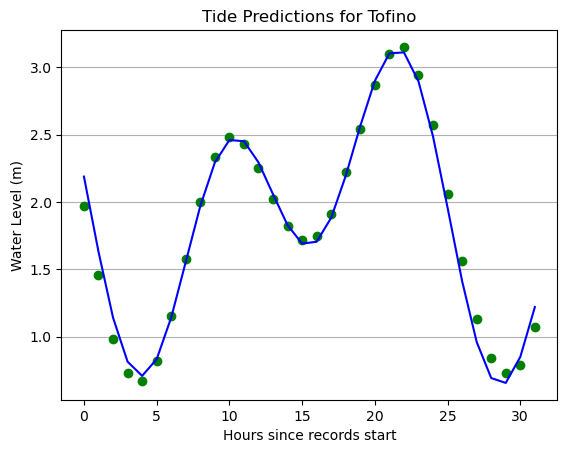

Harmonic constituent results:
Amplitude of K1 constituent is: 0.604m
Amplitude of M2 constituent is: 0.799m
Greenwich phase lag of K1 constituent is: 62.66°
Greenwich phase lag of M2 constituent is: 334.23°


In [231]:
plt.plot(waterlevels, 'go')
plt.plot(dataarray, 'b')
plt.title('Tide Predictions for Tofino')
plt.xlabel('Hours since records start')
plt.ylabel('Water Level (m)')
plt.grid(visible=True, which='both', axis='y')
plt.show()

print('\033[1m' + "Harmonic constituent results:" + '\033[0m')
print('Amplitude of K1 constituent is: '+str('%.3f' % amp_k1) + 'm')
print('Amplitude of M2 constituent is: '+str('%.3f' % amp_m2) + 'm')
print('Greenwich phase lag of K1 constituent is: '+str('%.2f' % phaseLag_K1[0]) + '°')
print('Greenwich phase lag of M2 constituent is: '+str('%.2f' % phaseLag_M2[0]) + '°')

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

In the code code cell below create a plot showing the **waterlevel data** points, the **NOAA tide prediction**, and your **tide prediction**. In addition, print out the results of the calculation of **amplitude** and **Greenwich phase lag** for each constituent.

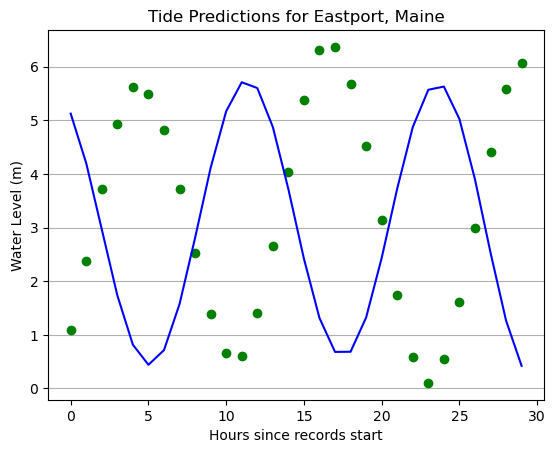

Harmonic constituent results:
Amplitude of M2 constituent is: 2.694m
Amplitude of N2 constituent is: 0.400m
Amplitude of S2 constituent is: 0.387m
Amplitude of K1 constituent is: 0.186m
Amplitude of O1 constituent is: 0.102m
Greenwich phase lag of M2 constituent is: 325.25°
Greenwich phase lag of N2 constituent is: 184.19°
Greenwich phase lag of S2 constituent is: 40.60°
Greenwich phase lag of K1 constituent is: 265.37°
Greenwich phase lag of O1 constituent is: 127.48°


In [232]:
#Start your code below
start_offset:int = 0
size:int = 30

plt.plot(Eastport_wl_arr[start_offset:start_offset+size], 'go')
plt.plot(data[start_offset:start_offset+size], 'b')
plt.title('Tide Predictions for Eastport, Maine')
plt.xlabel('Hours since records start')
plt.ylabel('Water Level (m)')
plt.grid(visible=True, which='both', axis='y')
plt.show()

constituent_names = ["M2", "N2", "S2", "K1", "O1"]
print('\033[1m' + "Harmonic constituent results:" + '\033[0m')
i = 0
for amp in Amplitudes_scaled:
    print('Amplitude of {} constituent is: {:.3f}m'.format(constituent_names[i], amp))
    i += 1

i = 0
for phase_lag in np.rad2deg(phase_lag_eastport):
    print('Greenwich phase lag of {} constituent is: {:.2f}°'.format(constituent_names[i],phase_lag))
    i += 1


You should now have a good idea of how well your prediction matches the NOAA prediction and the waterlevel data. Your prediction will not match exactly, but should be very close. Your prediction should match the shape of the NOAA prediction closely, and the calculated amplitude and phase values should be near the published values. If they are not, then something in your code is not correct!

## Conclusion

This exercise should have challenged not only your Python skills, but required you to utilize the knowledge and skills built through the sequence of GGE courses. 

<img align="left" width="6%" style="padding-right:10px; padding-top:10px;" src="images/refs.png">

## Useful References

* [The official Python 3.6 documentation](https://docs.python.org/3.6/index.html)
    * [CSV Files](https://docs.python.org/3/library/csv.html)
* [Matplotlib](https://matplotlib.org/index.html)
* [NOAA Tides and Currents](https://tidesandcurrents.noaa.gov/stations.html?type=Water+Levels)
* [Wikipedia](https://en.wikipedia.org/wiki/Main_Page)
    * [Tidal Constituents](https://en.wikipedia.org/wiki/Theory_of_tides#Tidal_constituents)
    * [Doodsen Numbers](https://en.wikipedia.org/wiki/Theory_of_tides#Doodson_numbers)